<a href="https://colab.research.google.com/github/monicasenna/movasc_scripts/blob/main/precip_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando pacotes necessários (executar apenas uma vez)
!pip install geopandas contextily

# Importando bibliotecas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import numpy as np
from scipy.interpolate import griddata

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Etapa 1: Carregar os dados
# Substitua 'seuarquivo.csv' pelo nome do seu arquivo (faça upload no Colab)
file_path = '/content/drive/MyDrive/Movasc2_scripts/avaliacao_2023_dez_monica.csv'
df = pd.read_csv(file_path)

# Verifica as primeiras linhas
print("Amostra dos dados:")
print(df.head())

Amostra dos dados:
   Unnamed: 0   ano  mes  latitude  longitude    prec_obs  prec_prev
0      115410  2023   12    -23.55     -45.55  113.107700  207.47508
1      115423  2023   12    -23.45     -46.05  122.370830  219.56190
2      115424  2023   12    -23.45     -45.95  117.097232  215.75829
3      115427  2023   12    -23.45     -45.65  113.430433  207.48428
4      115431  2023   12    -23.45     -45.25   98.516037  250.72044


In [ ]:
# Etapa 2: Calcular a anomalia
df['anomalia'] = df['prec_prev'] - df['prec_obs']

# Etapa 3: Converter para GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # WGS 84
)

# Reprojetar para Web Mercator para sobrepor com mapas do contextily
gdf = gdf.to_crs(epsg=3857)


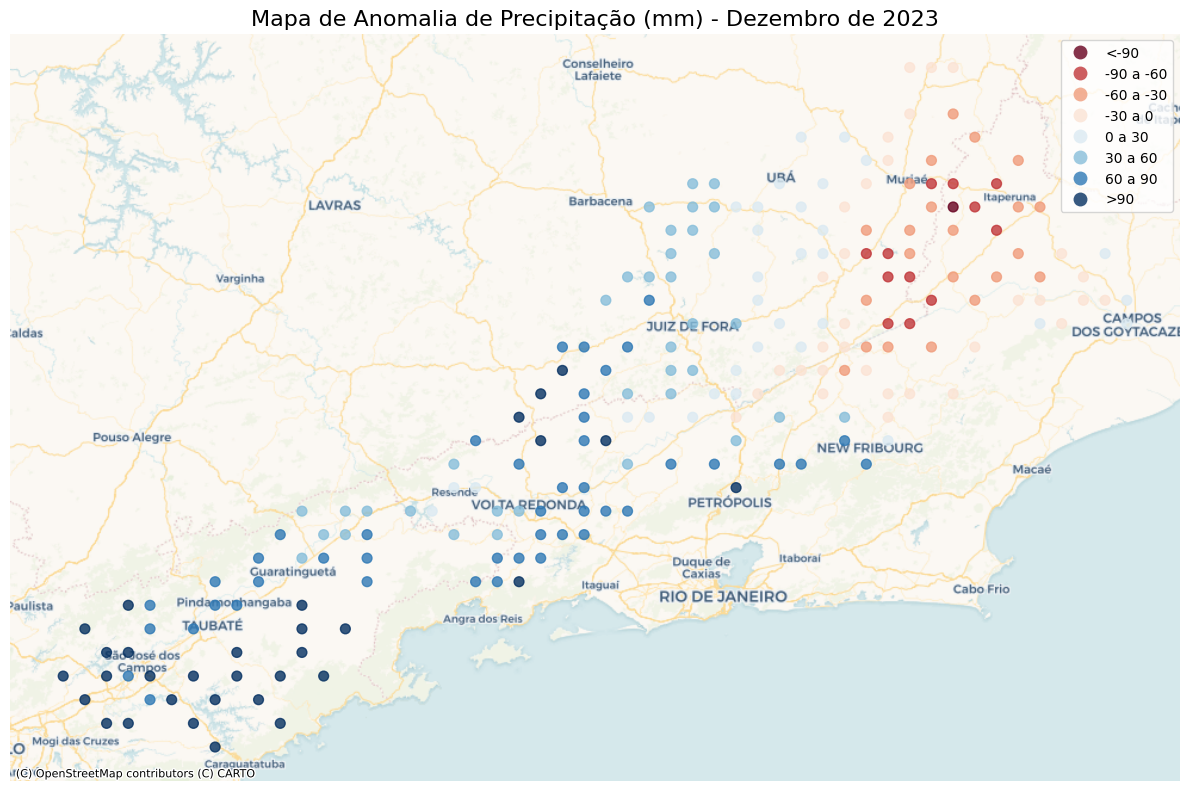

In [ ]:
# Etapa 4: Plotar o mapa de anomalia

# Definindo manualmente os intervalos (bins) e rótulos
bins = [-float('inf'), -90, -60, -30, 0, 30, 60, 90, float('inf')]
labels = ['<-90', '-90 a -60', '-60 a -30', '-30 a 0', '0 a 30', '30 a 60', '60 a 90', '>90']

# Criar uma nova coluna categórica
gdf['anomalia_bin'] = pd.cut(gdf['anomalia'], bins=bins, labels=labels)

# Definir uma paleta de cores personalizada (opcional)
colors = sns.color_palette("RdBu", n_colors=len(labels))

# Criar mapa com categorias
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(
    ax=ax,
    column='anomalia_bin',
    cmap='RdBu',
    legend=True,
    markersize=50,
    alpha=0.8
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)
ax.set_title("Mapa de Anomalia de Precipitação (mm) - Dezembro de 2023", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()